In [1]:
import swat
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create CAS Connection
conn = swat.CAS(host, portnum)

In [3]:
# Load Cereal CSV into CAS
cereal = conn.read_csv('/data/andre_data/Cereal Project - SWAT/cereal.csv')

NOTE: Cloud Analytic Services made the uploaded file available as table TMP34G68D50 in caslib CASUSER(sas).
NOTE: The table TMP34G68D50 has been created in caslib CASUSER(sas) from binary data uploaded to Cloud Analytic Services.


In [4]:
# # Load actionsets for analysis (for data prep, modeling, assessing)
# actionsets = ['cardinality', 'sampling', 'fedSQL', 'decisionTree', 'neuralNet', 'svm', 'astore']
# [conn.builtins.loadactionset(i) for i in actionsets]; # ';' Hides Output

In [5]:
# Data Dictionary from Kaggle

# Name:     Name of cereal
# mfr:      Manufacturer of cereal
#     A =   American Home Food Products;
#     G =   General Mills
#     K =   Kelloggs
#     N =   Nabisco
#     P =   Post
#     Q =   Quaker Oats
#     R =   Ralston Purina
# type:
#           cold
#           hot
# calories: calories per serving
# protein:  grams of protein
# fat:      grams of fat
# sodium:   milligrams of sodium
# fiber:    grams of dietary fiber
# carbo:    grams of complex carbohydrates
# sugars:   grams of sugars
# potass:   milligrams of potassium
# vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
# shelf:    display shelf (1, 2, or 3, counting from the floor)
# weight:   weight in ounces of one serving
# cups:     number of cups in one serving
# rating:   a rating of the cereals (Possibly from Consumer Reports?)

In [6]:
# Data Structure
cereal.columnInfo()

,Column,ID,Type,RawLength,FormattedLength,NFL,NFD
0,name,1,varchar,38,38,0,0
1,mfr,2,varchar,1,1,0,0
2,type,3,varchar,1,1,0,0
3,calories,4,double,8,12,0,0
4,protein,5,double,8,12,0,0
5,fat,6,double,8,12,0,0
6,sodium,7,double,8,12,0,0
7,fiber,8,double,8,12,0,0
8,carbo,9,double,8,12,0,0
9,sugars,10,double,8,12,0,0


In [7]:
# Preview of the Data
cereal.head(n=5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3.0,1.0,0.75,34.384843


In [8]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


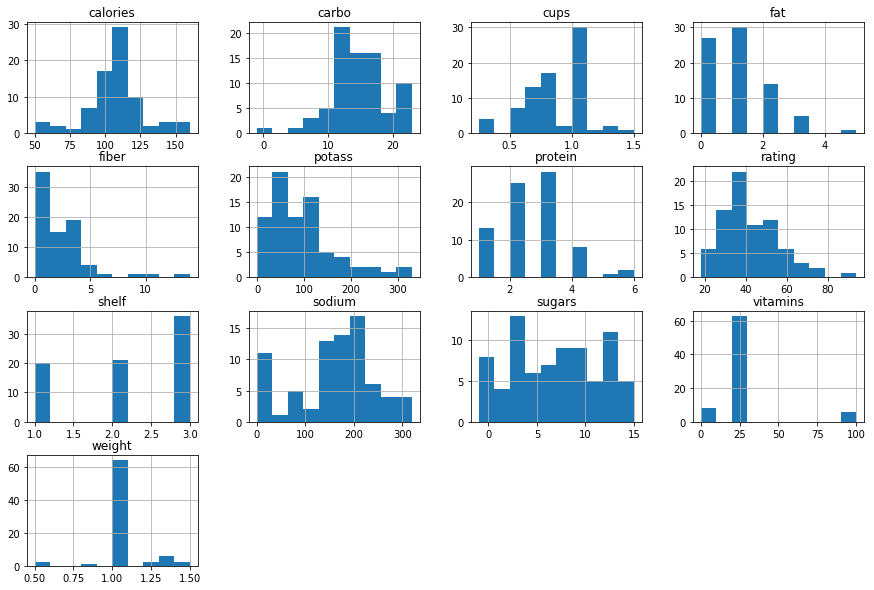

In [9]:
# Plot Individual Variable Distributions for EDA
cereal.hist(figsize = (15, 10));

In [10]:
conn.loadactionset('clustering');

NOTE: Added action set 'clustering'.


In [11]:
conn.kclus(table=cereal,
        inputs={"calories","protein","fat","sodium","fiber","carbo","sugars","potass",
                "vitamins","shelf","weight","cups","rating"},
        nClusters=3,
        seed=534,
        maxIters=40,
        init="RAND",
        outputTables={"names":{"nobs":"nobs",
                               "modelInfo":"modelInfo",
                               "ClusterSum":"ClusterSum",
                               "IterStats":"IterStats",
                               "DescStats":"DescStats",
                               "WithinClusStats":"WithinClusStats",
                               "ClusterCenters":"ClusterCenters"}},
        display={"names":["modelInfo","/Cluster"]},
        output={"casout":{"name":"score_out", "replace":"TRUE"},
                "copyvars":{"name","calories","protein","fat","sodium","fiber","carbo","sugars","potass",
                            "vitamins","shelf","weight","cups","rating"}});

NOTE: Using SEED=534.
NOTE: Running for input data for K 3.
NOTE: Clustering is finished. STOPVALUE is satisfied for STOPCRITERION=CLUSTER_CHANGE.
NOTE: The CAS table 'nobs' in caslib 'CASUSER(sas)' has 2 rows and 2 columns.
NOTE: The CAS table 'modelInfo' in caslib 'CASUSER(sas)' has 10 rows and 3 columns.
NOTE: The CAS table 'ClusterSum' in caslib 'CASUSER(sas)' has 3 rows and 9 columns.
NOTE: The CAS table 'IterStats' in caslib 'CASUSER(sas)' has 7 rows and 4 columns.
NOTE: The CAS table 'DescStats' in caslib 'CASUSER(sas)' has 13 rows and 3 columns.
NOTE: The CAS table 'WithinClusStats' in caslib 'CASUSER(sas)' has 39 rows and 4 columns.
NOTE: The CAS table 'ClusterCenters' in caslib 'CASUSER(sas)' has 3 rows and 15 columns.


In [12]:
# Summary Statistics of the Clusters
conn.CASTable('ClusterSum').head()

,Cluster,Frequency,MinDist,MaxDist,AvgDist,SSE,StdDeviation,NearestClus,DBtwCentroids
0,1,14.0,23.835384,142.390888,78.508304,100745.777188,84.829988,2.0,154.430361
1,2,47.0,10.365068,137.913065,60.193286,200185.353670,65.263028,1.0,154.430361
2,3,16.0,20.493405,99.160038,57.606284,60404.872195,61.443507,2.0,180.655187


In [13]:
# Show N-Observations of the Assigned Cluster Table
score_out = conn.CASTable('score_out')
score_out.head(n=5)

,sodium,rating,weight,potass,carbo,protein,fat,cups,calories,vitamins,name,fiber,sugars,shelf,_CLUSTER_ID_,_DISTANCE_
0,130.0,68.402973,1.0,280.0,5.0,4.0,1.0,0.33,70.0,25.0,100% Bran,10.0,6.0,3.0,1.0,90.236414
1,15.0,33.983679,1.0,135.0,8.0,3.0,5.0,1.00,120.0,0.0,100% Natural Bran,2.0,8.0,3.0,3.0,67.562488
2,260.0,59.425505,1.0,320.0,7.0,4.0,1.0,0.33,70.0,25.0,All-Bran,9.0,5.0,3.0,1.0,142.390888
3,140.0,93.704912,1.0,330.0,8.0,4.0,0.0,0.50,50.0,25.0,All-Bran with Extra Fiber,14.0,0.0,3.0,1.0,141.882153
4,200.0,34.384843,1.0,-1.0,14.0,2.0,2.0,0.75,110.0,25.0,Almond Delight,1.0,8.0,3.0,2.0,67.570434


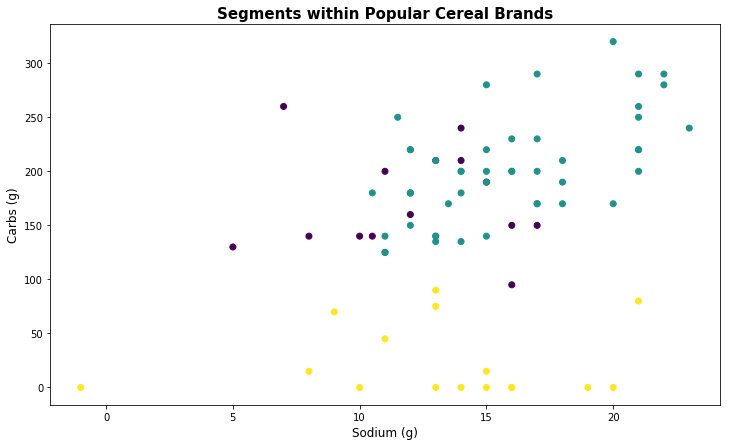

In [14]:
# Plot Assigned Clusters by Calories and Sugars
plt.figure(figsize=(12,7))
plt.scatter(x=score_out['carbo'], y=score_out['sodium'], c=score_out['_CLUSTER_ID_'])
plt.title('Segments within Popular Cereal Brands', fontsize=15, fontweight='bold')
plt.xlabel('Carbs (g)', fontsize=12)
plt.ylabel('Sodium (g)', fontsize=12);